## Package Installation.

In [1]:
!pip install pandas numpy matplotlib yfinance curl-cffi
!pip install --upgrade yfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.4/117.4 kB 7.9 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.57
    Uninstalling yfinance-0.2.57:
      Successfully uninstalled yfinance-0.2.57


## Importing Required Libraries

We begin by importing the essential Python libraries for this analysis:

- **yfinance**: To download historical stock price data directly from Yahoo Finance.
- **matplotlib.pyplot**: For visualizing data, including plots like the efficient frontier.
- **pandas**: For data manipulation and structuring time series financial data.
- **numpy**: For numerical operations, particularly in portfolio simulations.
- **curl_cffi.requests**: A more robust HTTP client used here to mimic a browser request when fetching data from Yahoo Finance, ensuring better stability and compatibility.

These libraries form the backbone of the robo-advisor and portfolio optimization logic used throughout the notebook.


In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from curl_cffi import requests

## Stock Selection and Data Retrieval

We start by defining a list of 8 stocks from various sectors including Finance, Energy, Health Services, and Consumer Services. These stocks are chosen to represent a diversified portfolio, which is essential for portfolio optimization and risk management;

1. MS: Morgan Stanley
2. HUM: Humana Inc.
3. BX: Blackstone Inc.
4. CVX: Chevron Corporation
5. LH: Labcorp Holdings Inc.
6. TTE: TotalEnergies SE
7. SBUX: Starbucks Corporation
8. ABNB: Airbnb, Inc.


These companies reprsent a wide range of industries, including;


*   Finance (Morgan Stanley, Blackstone)
*   Energy Minerals (TotalEnergies SE, Chevron Corporation)

*   Health Services (Labcorp Holdings Inc, Humana Inc.)
*   Consumer Services (Starbucks Corporation, Airbnb, Inc.)

To retrieve historical price data:
- We use the `yfinance` library with a custom session impersonating a Chrome browser (via `curl_cffi`) to ensure stable and authenticated data requests.
- For each stock ticker, we fetch 2 years of daily closing price data.
- The closing prices are stored in a dictionary (`stock_data`) for further analysis.
- Additionally, a random sample of each stock's data is printed to verify the data download.

This step ensures that we have clean and consistent price history for each asset before proceeding to portfolio analysis and simulation.






In [3]:
# Create a session that impersonates a Chrome browser
session = requests.Session(impersonate="chrome")

# Define the list of ticker symbols for the stocks you want to analyze
tickers = ["MS", "HUM", "BX", "CVX", "LH", "TTE", "SBUX", "ABNB"]

# Loop through each ticker in the list and download the data
stock_data = {}  # Dictionary to store data for each stock
for ticker_symbol in tickers:
    try:
        # Create the Ticker object with the session
        ticker = yf.Ticker(ticker_symbol, session=session)

        # Download the data for the last 2 years
        df = ticker.history(period="2y")

        # Store the data in the dictionary
        stock_data[ticker_symbol] = df['Close']  # Store only closing prices

        # Show a random sample of 5 rows from the data
        print(f"\nRandom sample for {ticker_symbol}:")
        print(df.sample(5))  # Displaying a random sample of the stock's data
    except Exception as e:
        print(f"Failed to download data for {ticker_symbol}: {e}")


Random sample for MS:
                                 Open        High         Low       Close  \
Date                                                                        
2025-01-16 00:00:00-05:00  130.428662  134.173485  129.985183  133.838425   
2025-04-11 00:00:00-04:00  102.071025  108.330797  102.071025  107.259399   
2023-10-11 00:00:00-04:00   75.064898   75.346704   73.937652   74.116135   
2023-06-30 00:00:00-04:00   80.063913   80.501371   79.486847   79.486847   
2024-11-07 00:00:00-05:00  128.842046  129.640284  126.220657  126.575432   

                             Volume  Dividends  Stock Splits  
Date                                                          
2025-01-16 00:00:00-05:00  16235700        0.0           0.0  
2025-04-11 00:00:00-04:00  10573200        0.0           0.0  
2023-10-11 00:00:00-04:00   8928700        0.0           0.0  
2023-06-30 00:00:00-04:00   6188200        0.0           0.0  
2024-11-07 00:00:00-05:00   7780000        0.0           0.

## Calculating Expected Returns and Covariance Matrix

With the historical closing prices collected, we now compute two key inputs required for portfolio optimization:

- **Expected Returns**: We calculate the mean daily return for each stock and annualize it by multiplying by 252 (the average number of trading days in a year). This gives us an estimate of how much return we can expect from each asset over a year.

- **Covariance Matrix**: This matrix measures how asset returns move in relation to each other. A positive covariance indicates that two assets tend to move in the same direction, while a negative covariance means they move inversely. This is critical for understanding diversification benefits and optimizing risk.

These values serve as the foundation for constructing efficient portfolios based on Modern Portfolio Theory (MPT).

In [4]:
# Convert the dictionary to a DataFrame
price_data = pd.DataFrame(stock_data)

# Calculate Daily Returns (percentage change of the closing prices)
returns = price_data.pct_change() #This calculates the daily percentage returns for each stock

# Calculate the expected returns (average of the daily returns for each stock)
expected_returns = returns.mean() * 252  # Multiply by 252 to annualize the returns (trading days in a year)

# Calculate the Covariance Matrix
cov_matrix = returns.cov() * 252  # Annualize the covariance matrix

# Display the results
print("Expected Returns (Annualized):")
print(expected_returns)
print("\nCovariance Matrix (Annualized):")
print(cov_matrix)

Expected Returns (Annualized):
MS      0.264838
HUM    -0.289594
BX      0.359093
CVX    -0.007027
LH      0.167368
TTE     0.044567
SBUX   -0.051081
ABNB    0.072916
dtype: float64

Covariance Matrix (Annualized):
            MS       HUM        BX       CVX        LH       TTE      SBUX  \
MS    0.087715  0.014577  0.069702  0.028875  0.022714  0.019303  0.032778   
HUM   0.014577  0.139481  0.016904  0.006602  0.010644 -0.007177  0.006831   
BX    0.069702  0.016904  0.119378  0.029905  0.025772  0.021529  0.041556   
CVX   0.028875  0.006602  0.029905  0.052346  0.012566  0.029304  0.019897   
LH    0.022714  0.010644  0.025772  0.012566  0.045038  0.009256  0.014955   
TTE   0.019303 -0.007177  0.021529  0.029304  0.009256  0.047137  0.018562   
SBUX  0.032778  0.006831  0.041556  0.019897  0.014955  0.018562  0.116289   
ABNB  0.047912  0.010844  0.066408  0.022680  0.016055  0.016030  0.035526   

          ABNB  
MS    0.047912  
HUM   0.010844  
BX    0.066408  
CVX   0.022680

## Portfolio Simulation and Efficient Frontier Visualization

To identify the most efficient portfolios, we simulate 10,000 different combinations of asset weightings using the previously calculated expected returns and covariance matrix.

### Simulation Logic:
- Each simulated portfolio is assigned a random set of weights summing to 1.
- For each portfolio, we calculate:
  - **Expected Return** (weighted average of individual expected returns)
  - **Portfolio Volatility** (using the covariance matrix)
  - **Sharpe Ratio** (risk-adjusted return, assuming a risk-free rate of 3%)

### Efficient Frontier:
The results of the simulation are visualized on a scatter plot:
- **X-axis**: Portfolio Volatility (Risk)
- **Y-axis**: Expected Return
- **Color**: Sharpe Ratio (using a gradient color map for visual emphasis)
- The **red star** highlights the portfolio with the maximum Sharpe Ratio, representing the most efficient risk-adjusted return.

This visualization helps investors understand the trade-off between risk and return and aids in selecting portfolios based on their risk appetite.



Portfolio with the Maximum Sharpe Ratio:
Return          0.230846
Volatility      0.222734
Sharpe Ratio    0.901728
Name: 5605, dtype: float64


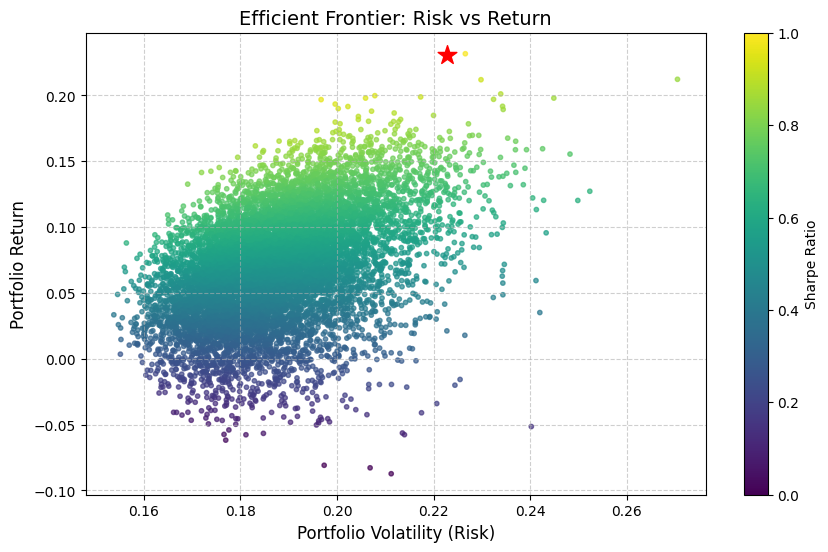

In [9]:
# Number of portfolios to simulate
num_portfolios = 10000

# Create arrays to store the results
results = np.zeros((3, num_portfolios))  # Row 0: Portfolio returns, Row 1: Portfolio Volatility, Row 2: Sharpe Ratio

# Risk-free rate (for Sharpe ratio calculation)
rf_rate = 0.03  # Assume a risk-free rate of 3%

# Generate portfolios
for i in range(num_portfolios):
    # Randomly generate portfolio weights
    weights = np.random.random(len(expected_returns))  # Generate random weights for each asset
    weights /= np.sum(weights)  # Normalize the weights so that they sum to 1

    # Calculate portfolio return
    portfolio_return = np.sum(weights * expected_returns)

    # Calculate portfolio volatility (standard deviation)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

    # Calculate the Sharpe ratio
    sharpe_ratio = (portfolio_return - rf_rate) / portfolio_volatility

    # Store the results
    results[0, i] = portfolio_return
    results[1, i] = portfolio_volatility
    results[2, i] = sharpe_ratio

# Convert results into a DataFrame for easy visualization
portfolio_results = pd.DataFrame(results.T, columns=["Return", "Volatility", "Sharpe Ratio"])

# Display the portfolio with the maximum Sharpe ratio
max_sharpe_portfolio = portfolio_results.iloc[portfolio_results["Sharpe Ratio"].idxmax()]
print("\nPortfolio with the Maximum Sharpe Ratio:")
print(max_sharpe_portfolio)

# Plotting the results: Risk vs Return (Efficient Frontier)
plt.figure(figsize=(10, 6))
plt.scatter(portfolio_results.Volatility, portfolio_results.Return, c=portfolio_results["Sharpe Ratio"], cmap='viridis', marker='o', s=10, alpha=0.7)

# Highlight the max Sharpe ratio portfolio
max_sharpe_idx = portfolio_results["Sharpe Ratio"].idxmax()
max_sharpe_ret = portfolio_results.loc[max_sharpe_idx, "Return"]
max_sharpe_vol = portfolio_results.loc[max_sharpe_idx, "Volatility"]

plt.scatter(max_sharpe_vol,
            max_sharpe_ret,
            color='red',
            marker='*',
            s=200,
            label='Max Sharpe Ratio Portfolio')

plt.colorbar(label="Sharpe Ratio")
plt.title("Efficient Frontier: Risk vs Return", fontsize=14)
plt.xlabel("Portfolio Volatility (Risk)", fontsize=12)
plt.ylabel("Portfolio Return", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Client Profile Input and Personalized Recommendation

In this section, we collect essential information from the client to personalize the investment strategy:

- **Age**: Used for context but not directly influencing portfolio decisions.
- **Risk Tolerance (1–10 scale)**: Determines whether the client is Conservative, Moderate, or Aggressive.
- **Investment Horizon (in years)**: Helps determine whether short-term or long-term strategies are more suitable.
- **Initial Investment Amount**: Provides a basis for portfolio allocation.

Based on the risk tolerance, a predefined set of stocks is selected to reflect the client's preference for risk and return:

- **Conservative**: Low-volatility, stable stocks
- **Moderate**: Balanced mix of value and growth stocks
- **Aggressive**: High-growth, higher-volatility assets

The system then displays a summary of the client profile and provides tailored recommendations.

In [10]:
age = int(input("Your age: "))
risk_tolerance = int(input("Enter your risk tolerance (1-10, where 1=Conservative, 5=Moderate, 10=Aggressive): "))
investment_horizon = int(input("Enter your investment horizon (in years): "))
initial_amount = float(input("Enter your initial investment amount: $"))

# Categorize risk tolerance and assign corresponding stocks
if risk_tolerance <= 3:
    risk_category = "Conservative"
    stocks = ['MS', 'HUM']
elif risk_tolerance <= 7:
    risk_category = "Moderate"
    stocks = ['BX', 'CVX', 'LH']
else:
    risk_category = "Aggressive"
    stocks = ['TTE', 'SBUX', 'ABNB']

# Display the results
print(f"\n--- Robo-Advisor Summary ---")
print(f"Age: {age}")
print(f"Risk Tolerance: {risk_category} (Scale: 1-10, your score: {risk_tolerance})")
print(f"Investment Horizon: {investment_horizon} years")
print(f"Initial Investment Amount: ${initial_amount:.2f}")
print(f"Risk Category: {risk_category}")
print(f"Stocks: {stocks}")

# Provide some insights based on the risk tolerance and investment horizon
if risk_tolerance <= 3:
    print("\nRecommendation: A Conservative portfolio with stable, low-risk investments is advisable.")
elif risk_tolerance <= 7:
    print("\nRecommendation: A Moderate / Balanced portfolio with a mix of stocks and bonds could be suitable.")
else:
    print("\nRecommendation: An Aggressive portfolio with a higher allocation in stocks or growth-oriented assets may align with your preferences.")

if investment_horizon < 5:
    print("Short-term horizon detected. It may be ideal to keep investments more liquid and avoid high-volatility assets.")
else:
    print("Long-term horizon detected. You may have more room for growth-focused investments with higher returns over time.")

Your age: 27
Enter your risk tolerance (1-10, where 1=Conservative, 5=Moderate, 10=Aggressive): 4
Enter your investment horizon (in years): 10
Enter your initial investment amount: $10000

--- Robo-Advisor Summary ---
Age: 27
Risk Tolerance: Moderate (Scale: 1-10, your score: 4)
Investment Horizon: 10 years
Initial Investment Amount: $10000.00
Risk Category: Moderate
Stocks: ['BX', 'CVX', 'LH']

Recommendation: A Moderate / Balanced portfolio with a mix of stocks and bonds could be suitable.
Long-term horizon detected. You may have more room for growth-focused investments with higher returns over time.


## Portfolio Recommendation Based on Risk Tolerance

To align investment strategy with the client's risk preference, we recommend a portfolio that best matches their risk profile:

- **Conservative Investors** (Risk Tolerance ≤ 3): Recommended the portfolio with the **lowest volatility**, emphasizing capital preservation and stability.
- **Moderate Investors** (Risk Tolerance 4–7): Recommended a portfolio with **medium volatility**, selected from the interquartile range of the volatility distribution. This strikes a balance between risk and return.
- **Aggressive Investors** (Risk Tolerance > 7): Recommended the portfolio with the **highest expected return**, accepting higher volatility in exchange for growth potential.

The function prints the details of the suggested portfolio and returns it for further analysis or visualization. This tailored recommendation ensures each client receives a strategy suited to their financial goals and risk appetite.


In [11]:
def recommend_optimal_portfolio(risk_tolerance):
    if risk_tolerance <= 3:
        recommended_portfolio = portfolio_results.loc[portfolio_results['Volatility'] == portfolio_results['Volatility'].min()]
        risk_category = "Conservative"

    elif risk_tolerance <= 7:
        recommended_portfolio = portfolio_results.loc[(portfolio_results['Volatility'] >= portfolio_results['Volatility'].quantile(0.25)) &
                                                     (portfolio_results['Volatility'] <= portfolio_results['Volatility'].quantile(0.75))]
        risk_category = "Moderate"

    else:
        recommended_portfolio = portfolio_results.loc[portfolio_results['Return'] == portfolio_results['Return'].max()]
        risk_category = "Aggressive"

    # Print the recommended portfolio
    print(f"\nRecommended {risk_category} Portfolio:")
    print(recommended_portfolio)

    return recommended_portfolio

# Recommend the optimal portfolio based on the risk tolerance
optimal_portfolio = recommend_optimal_portfolio(risk_tolerance)


Recommended Moderate Portfolio:
        Return  Volatility  Sharpe Ratio
0     0.037281    0.183847      0.039602
1     0.054986    0.180011      0.138801
2     0.058522    0.181689      0.156984
3     0.044390    0.185491      0.077578
4     0.057184    0.185942      0.146198
...        ...         ...           ...
9990  0.102811    0.178427      0.408074
9991  0.120092    0.190601      0.472674
9994  0.068100    0.192270      0.198157
9995  0.074704    0.179420      0.249160
9997  0.148776    0.191813      0.619228

[5000 rows x 3 columns]
